In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Normalize the image data to range [0, 1]
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Flatten the images
x_test = x_test.reshape(-1, 28 * 28) / 255.0

In [5]:
x_train.shape

(60000, 784)

In [6]:
# Equivalent variables
data = x_train          # Training images
labels = y_train        # Training labels
test_data = x_test      # Test images
test_labels = y_test    # Test labels

In [7]:
# Verify the shapes
print("Training data shape:", data.shape)
print("Training labels shape:", labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


In [8]:
# # Define the model
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
#     tf.keras.layers.Dense(10, activation='sigmoid')  # 10 classes for MNIST digits
# ])

Activation Functions

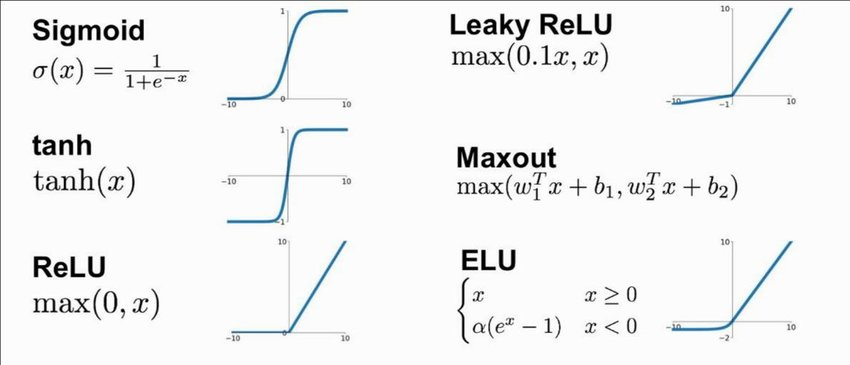

In [9]:
#updating model with hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
    tf.keras.layers.Dense(100, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(10, activation='sigmoid')  # 10 classes for MNIST digits
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 2ms/step - loss: 0.3498 - accuracy: 0.9030
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1635 - accuracy: 0.9532
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1177 - accuracy: 0.9657
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9731
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9777
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0624 - accuracy: 0.9815
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9847
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0447 - accuracy: 0.9873
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0387 - accuracy: 0.9889
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0328 - accuracy: 0.9908

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


313/313 [==============================] - 1s 2ms/step


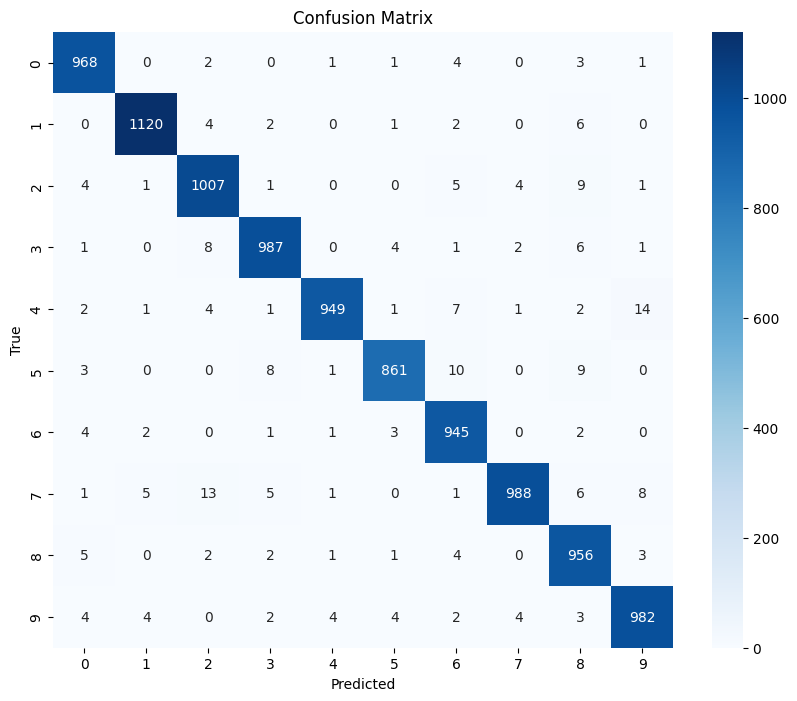

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = np.argmax(model.predict(test_data), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()